In [6]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import pickle
from joblib import dump, load

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
directory = './template_data/set_4/'

## Intro

The purpose of this notebook is to train and test a machine learning algorithm to determine the number of pulses in an island. It should be able to look at an island and tells us with x% confidence that it is a single, double, triple, or quadruple pile up event

This notebook looks closely at just three algorithms, but for different artificial pulse time offsets and training dataset sizes

In [4]:
def getData(name, size=0.2):
    with open(directory + 'data/x_'+name+'.data', 'rb') as xFile:
        biggestX = pickle.load(xFile)
        bigX = []
        for x in biggestX:
            bigX.append(x[1])
        xFile.close()

    with open(directory + 'data/y_'+name+'.data', 'rb') as yFile:
        bigY = pickle.load(yFile)
        yFile.close()
        
    return train_test_split(bigX, bigY, test_size=size)

## Vary minTimeOffset

### Nearest Neighbor

In [10]:
for minTime in np.linspace(0.0, 4.5, num=10):
    print('------ starting minTime {0} ------'.format(minTime))

    if(minTime < 1):
        name = '0' + str(int(minTime*10))
    else:
        name = str(int(minTime*10))

    print('generating train/test sets ...')    
    x_train, x_test, y_train, y_test = getData(name)

    print('training model ...')
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(x_train, y_train)

    print('generating confusion matrix ...')
    matrix = confusion_matrix(y_true=y_test,
                              y_pred=knn_model.predict(x_test[:20001]),
                              normalize='true')

    confusionDf = pd.DataFrame(data=matrix,
                               index=['0', '1', '2', '3', '4'],
                               columns=['0', '1', '2', '3', '4'])

    confusionDf.to_csv(directory + 'metrics/confusion_knn_' + name + '.csv')

    dump(knn_model, directory + 'models/knn_' + name + '.joblib');

------ starting minTime 0.0 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 0.5 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 1.0 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 1.5 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 2.0 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 2.5 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 3.0 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 3.5 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 4.0 ------
generating train/test sets ..

### Random Forest

In [11]:
for minTime in np.linspace(0.0, 4.5, num=10):
    print('------ starting minTime {0} ------'.format(minTime))

    if(minTime < 1):
        name = '0' + str(int(minTime*10))
    else:
        name = str(int(minTime*10))

    print('generating train/test sets ...')    
    x_train, x_test, y_train, y_test = getData(name)

    print('training model ...')
    rfc_model = RandomForestClassifier()
    rfc_model.fit(x_train, y_train)

    print('generating confusion matrix ...')
    matrix = confusion_matrix(y_true=y_test,
                              y_pred=rfc_model.predict(x_test[:20001]),
                              normalize='true')

    confusionDf = pd.DataFrame(data=matrix,
                               index=['0', '1', '2', '3', '4'],
                               columns=['0', '1', '2', '3', '4'])

    confusionDf.to_csv(directory + 'metrics/confusion_rfc_' + name + '.csv')

    dump(rfc_model, directory + 'models/rfc_' + name + '.joblib');

------ starting minTime 0.0 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 0.5 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 1.0 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 1.5 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 2.0 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 2.5 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 3.0 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 3.5 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting minTime 4.0 ------
generating train/test sets ..

### Multi-Layer Perceptron

In [12]:
for minTime in np.linspace(0.0, 4.5, num=10):
    print('------ starting minTime {0} ------'.format(minTime))

    if(minTime < 1):
        name = '0' + str(int(minTime*10))
    else:
        name = str(int(minTime*10))

    print('generating train/test sets ...')    
    x_train, x_test, y_train, y_test = getData(name)

    print('training model ...')
    mlp_model = MLPClassifier()
    mlp_model.fit(x_train, y_train)

    print('generating confusion matrix ...')
    matrix = confusion_matrix(y_true=y_test,
                              y_pred=mlp_model.predict(x_test[:20001]),
                              normalize='true')

    confusionDf = pd.DataFrame(data=matrix,
                               index=['0', '1', '2', '3', '4'],
                               columns=['0', '1', '2', '3', '4'])

    confusionDf.to_csv(directory + 'metrics/confusion_mlp_' + name + '.csv')

    dump(mlp_model, directory + 'models/mlp_' + name + '.joblib');

------ starting minTime 0.0 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting minTime 0.5 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting minTime 1.0 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting minTime 1.5 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting minTime 2.0 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting minTime 2.5 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting minTime 3.0 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting minTime 3.5 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting minTime 4.0 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting minTime 4.5 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...


## Vary minTimeOffset, but only use the model trained on 0.0

### Nearest Neighbor

In [6]:
knn_model = load(directory + 'models/knn_00.joblib')

for minTime in np.linspace(0.0, 4.5, num=10):
    print('------ starting minTime {0} ------'.format(minTime))

    if(minTime < 1):
        name = '0' + str(int(minTime*10))
    else:
        name = str(int(minTime*10))

    print('generating train/test sets ...')    
    x_train, x_test, y_train, y_test = getData(name)

    print('generating confusion matrix ...')
    matrix = confusion_matrix(y_true=y_test,
                              y_pred=knn_model.predict(x_test[:20001]),
                              normalize='true')

    confusionDf = pd.DataFrame(data=matrix,
                               index=['0', '1', '2', '3', '4'],
                               columns=['0', '1', '2', '3', '4'])

    confusionDf.to_csv(directory + 'metrics_00/confusion_knn_' + name + '.csv')

------ starting minTime 0.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 0.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 1.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 1.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 2.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 2.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 3.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 3.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 4.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 4.5 ------
generating train/test sets ...
generating confusion matrix ...


### Random Forest

In [5]:
rfc_model = load(directory + 'models/rfc_00.joblib')

for minTime in np.linspace(0.0, 4.5, num=10):
    print('------ starting minTime {0} ------'.format(minTime))

    if(minTime < 1):
        name = '0' + str(int(minTime*10))
    else:
        name = str(int(minTime*10))

    print('generating train/test sets ...')    
    x_train, x_test, y_train, y_test = getData(name)

    print('generating confusion matrix ...')
    matrix = confusion_matrix(y_true=y_test,
                              y_pred=rfc_model.predict(x_test[:20001]),
                              normalize='true')

    confusionDf = pd.DataFrame(data=matrix,
                               index=['0', '1', '2', '3', '4'],
                               columns=['0', '1', '2', '3', '4'])

    confusionDf.to_csv(directory + 'metrics_00/confusion_rfc_' + name + '.csv')

------ starting minTime 0.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 0.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 1.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 1.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 2.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 2.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 3.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 3.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 4.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 4.5 ------
generating train/test sets ...
generating confusion matrix ...


### Multi-Layer Perceptron

In [6]:
mlp_model = load(directory + 'models/mlp_00.joblib')

for minTime in np.linspace(0.0, 4.5, num=10):
    print('------ starting minTime {0} ------'.format(minTime))

    if(minTime < 1):
        name = '0' + str(int(minTime*10))
    else:
        name = str(int(minTime*10))

    print('generating train/test sets ...')    
    x_train, x_test, y_train, y_test = getData(name)

    print('generating confusion matrix ...')
    matrix = confusion_matrix(y_true=y_test,
                              y_pred=mlp_model.predict(x_test[:20001]),
                              normalize='true')

    confusionDf = pd.DataFrame(data=matrix,
                               index=['0', '1', '2', '3', '4'],
                               columns=['0', '1', '2', '3', '4'])

    confusionDf.to_csv(directory + 'metrics_00/confusion_mlp_' + name + '.csv')

------ starting minTime 0.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 0.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 1.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 1.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 2.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 2.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 3.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 3.5 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 4.0 ------
generating train/test sets ...
generating confusion matrix ...
------ starting minTime 4.5 ------
generating train/test sets ...
generating confusion matrix ...


## Vary training size

use training sizes 10-80 thousand

minPulseOffset=0

### Nearest Neighbor

In [11]:
for size in range(1000, 8001, 1000):
    print('------ starting train size {0} ------'.format(size))
    name = str(size)
    
    print('generating train/test sets ...')    
    X_train, x_test, Y_train, y_test = getData('00')
    
    x_train = X_train[:size+1]
    y_train = Y_train[:size+1]

    print('training model ...')
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(x_train, y_train)

    print('generating confusion matrix ...')
    matrix = confusion_matrix(y_true=y_test,
                              y_pred=knn_model.predict(x_test[:20001]),
                              normalize='true')

    confusionDf = pd.DataFrame(data=matrix,
                               index=['0', '1', '2', '3', '4'],
                               columns=['0', '1', '2', '3', '4'])

    confusionDf.to_csv(directory + 'metrics_train_size/confusion_knn_' + name + '.csv')

    dump(knn_model, directory + 'models_train_size/knn_' + name + '.joblib');
    

------ starting train size 1000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 2000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 3000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 4000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 5000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 6000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 7000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 8000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...


### Random Forest

In [12]:
X_train, x_test, Y_train, y_test = getData('00')

for size in range(1000, 8001, 1000):
    print('------ starting train size {0} ------'.format(size))
    name = str(size)
    
    print('generating train/test sets ...')    
    
    x_train = X_train[:size+1]
    y_train = Y_train[:size+1]

    print('training model ...')
    rfc_model = RandomForestClassifier()
    rfc_model.fit(x_train, y_train)

    print('generating confusion matrix ...')
    matrix = confusion_matrix(y_true=y_test,
                              y_pred=rfc_model.predict(x_test[:20001]),
                              normalize='true')

    confusionDf = pd.DataFrame(data=matrix,
                               index=['0', '1', '2', '3', '4'],
                               columns=['0', '1', '2', '3', '4'])

    confusionDf.to_csv(directory + 'metrics_train_size/confusion_rfc_' + name + '.csv')

    dump(rfc_model, directory + 'models_train_size/rfc_' + name + '.joblib');
    

------ starting train size 1000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 2000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 3000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 4000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 5000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 6000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 7000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...
------ starting train size 8000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...


### Multi-Layer Perceptron

In [13]:
X_train, x_test, Y_train, y_test = getData('00')

for size in range(1000, 8001, 1000):
    print('------ starting train size {0} ------'.format(size))
    name = str(size)
    
    print('generating train/test sets ...')    
        
    x_train = X_train[:size+1]
    y_train = Y_train[:size+1]

    print('training model ...')
    mlp_model = MLPClassifier()
    mlp_model.fit(x_train, y_train)

    print('generating confusion matrix ...')
    matrix = confusion_matrix(y_true=y_test,
                              y_pred=mlp_model.predict(x_test[:20001]),
                              normalize='true')

    confusionDf = pd.DataFrame(data=matrix,
                               index=['0', '1', '2', '3', '4'],
                               columns=['0', '1', '2', '3', '4'])

    confusionDf.to_csv(directory + 'metrics_train_size/confusion_mlp_' + name + '.csv')

    dump(mlp_model, directory + 'models_train_size/mlp_' + name + '.joblib');

------ starting train size 1000 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting train size 2000 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting train size 3000 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting train size 4000 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting train size 5000 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting train size 6000 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting train size 7000 ------
generating train/test sets ...
training model ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


generating confusion matrix ...
------ starting train size 8000 ------
generating train/test sets ...
training model ...
generating confusion matrix ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Looking at set 5

In [8]:
directory = './template_data/set_5/'

In [9]:
with open(directory + 'x_train.data', 'rb') as xFile:
    biggestX = pickle.load(xFile)
    x_train = []
    for x in biggestX[:6000]:
        x_train.append(x[1])
    xFile.close()
    
with open(directory + 'x_test.data', 'rb') as xFile:
    biggestX = pickle.load(xFile)
    x_test = []
    for x in biggestX[:2000]:
        x_test.append(x[1])
    xFile.close()

with open(directory + 'y_train.data', 'rb') as yFile:
    biggestY = pickle.load(yFile)
    y_train = biggestY[:6000]
    yFile.close()
    
with open(directory + 'y_test.data', 'rb') as yFile:
    biggestY = pickle.load(yFile)
    y_test = biggestY[:2000]
    yFile.close()

In [13]:
print('training knn model ...')
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

print('generating knn confusion matrix ...')
matrix = confusion_matrix(y_true=y_test,
                          y_pred=knn_model.predict(x_test),
                          normalize='true')

confusionDf = pd.DataFrame(data=matrix,
                           index=['1', '2', '3', '4', '5', '6'],
                           columns=['1', '2', '3', '4', '5', '6'])

confusionDf.to_csv(directory + 'metrics/confusion_knn.csv')

dump(knn_model, directory + 'models/knn.joblib');



print('training rfc model ...')
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

print('generating rfc confusion matrix ...')
matrix = confusion_matrix(y_true=y_test,
                          y_pred=rfc_model.predict(x_test),
                          normalize='true')

confusionDf = pd.DataFrame(data=matrix,
                           index=['1', '2', '3', '4', '5', '6'],
                           columns=['1', '2', '3', '4', '5', '6'])

confusionDf.to_csv(directory + 'metrics/confusion_rfc.csv')

dump(rfc_model, directory + 'models/rfc.joblib');
    
    
print('training mlp model ...')
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)

print('generating mlp confusion matrix ...')
matrix = confusion_matrix(y_true=y_test,
                          y_pred=mlp_model.predict(x_test),
                          normalize='true')

confusionDf = pd.DataFrame(data=matrix,
                           index=['1', '2', '3', '4', '5', '6'],
                           columns=['1', '2', '3', '4', '5', '6'])

confusionDf.to_csv(directory + 'metrics/confusion_mlp.csv')

dump(mlp_model, directory + 'models/mlp.joblib');

training knn model ...
generating knn confusion matrix ...
training rfc model ...
generating rfc confusion matrix ...
training mlp model ...
generating mlp confusion matrix ...


/home/lars/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


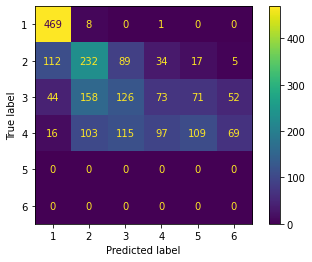

In [15]:
plot_confusion_matrix(knn_model, x_test, y_test)